In [111]:
import tweepy
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

## Connecting to twitter API

In [10]:
access_token="xxxxx"

access_token_secret="xxxxx"

api_key="xxxxxxxxxx"

api_secret="xxxxxxxxx"

In [11]:
auth=tweepy.OAuthHandler(consumer_key=api_key,consumer_secret=api_secret)

auth.set_access_token(access_token,access_token_secret)

api=tweepy.API(auth)

## Getting top 10 trend topics.

In [105]:
india_woeid=23424848 #Where on earth Id for India

In [14]:
trend_results=api.get_place_trends(india_woeid)

In [18]:
trending_tags=[]

In [20]:
for trend in trend_results[0]['trends'][:10]:
    trending_tags.append(trend['name'])

In [21]:
trending_tags

['#askmrunal',
 'Happy Easter',
 '#MilletsNaturalFarming4Health',
 '#TigerInKarnataka',
 '#AyodhyaMeEknath',
 '#गुरु_हैं_चारों_धाम',
 'सचिन पायलट',
 'taylor',
 'बांदीपुर टाइगर रिजर्व',
 '100 EPS OF AMRITA BRAR']

## Creating a DataFrame

Getting 100 tweets for each trend.

In [119]:
data={}
for i in trending_tags:
    t=[]
    tweets=tweepy.Cursor(api.search_tweets,q=i).items(100)
    for tweet in tweets:
        t.append(tweet.text)

In [ ]:
df=pd.DataFrame(data=data)

In [144]:
df

,#askmrunal,Happy Easter,#MilletsNaturalFarming4Health,#TigerInKarnataka,#AyodhyaMeEknath,#गुरु_हैं_चारों_धाम,सचिन पायलट,taylor,बांदीपुर टाइगर रिजर्व,100 EPS OF AMRITA BRAR
0,.@mrunal0801 What celebrity would you rate as ...,"RT @legitlaurag: He is risen, the tomb is empt...",RT @chatterchatru: वर्ष 2023 के बजट में वित्त ...,RT @Tejasvi_Surya: Karnataka welcomes our most...,RT @thakkar_sameet: राम मंदिर हर हिंदू का सपना...,RT @mahesh_mun79601: शब्द गुरु का शब्द है काया...,RT @anshuj55: सचिन पायलट जो राजनैतिक विसात बिछ...,RT @pricesandvices: I just saw a TikTok Swifti...,कर्नाटक के बांदीपुर टाइगर रिजर्व में प्रधानमंत...,"RT @Thokar6Ajay: ""A quarter may not sound like..."
1,Check out Super survival seed bank (200+ Seeds...,RT @sp19047: Happy Easter everyone! 🐇🥚\nUnfort...,RT @BJP4Andhra: మోదీ ప్రభుత్వ అవిశ్రాంత ప్రయత్...,RT @Iamsisodia1: प्रकृति के बीच कुछ अविस्मरणीय...,RT @thakkar_sameet: INDIA IS HINDU RASHTRA IT ...,RT @JShahu1: जय जय गुरुदेव\n गुरु की आज्ञा आवै...,@Richasharma0971 \n\n@ ashutosh83B\nसचिन पायलट...,@_butitsgolden13 @midnightstrack2 Taylor’s not...,RT @jtnladakh: माननीय प्रधानमंत्री श्री नरेंद्...,"""A quarter may not sound like a lot in money, ..."
2,@mrunal0801 \n#askmrunal,"RT @Siapou1: Happy Easter from Edie, Divine's ...",RT @kmshambhu: श्रीअन्न यानि देश के छोटे किसान...,RT @Tejasvi_Surya: India is home to 75% of wor...,RT @thakkar_sameet: राम मंदिर हर हिंदू का सपना...,RT @B2biharijaiguru: जय गुरुदेव नाम प्रभु का \...,RT @QamarAnchor: सचिन पायलट ने हनुमान बेनीवाल ...,RT @bugaboo_s: No me pueden decir que taylor y...,RT @HitenPithadiya: @narendramodi सुना है बांद...,RT @Thokar6Ajay: Whats the difference between ...
3,RT @itz_jaiTheri: 1 Word About Thalapathy Vija...,RT @DefenceU: Happy Easter to everyone who is ...,RT @kesavakanth1: मोदी सरकार के अथक प्रयासों स...,RT @Tejasvi_Surya: Glimpses from PM Sri @naren...,RT @thakkar_sameet: From ban on Ganeshotsav to...,"RT @Veena_Yadav_728: गुरू गोविन्द दोऊ खड़े, का...",RT @AmanChopra_: नाम नहीं लिया लेकिन संभवतः का...,RT @IfMisoWasAMovie: Every song Taylor Swift w...,RT @sujitkumar4bjp: कर्नाटक के बांदीपुर टाइगर ...,RT @Thokar6Ajay: Ego is the death of creativit...
4,@mrunal0801 what is the reason behind your soo...,RT @snarky_kate: Happy Easter everyone 🐣\n\nYo...,RT @BJPMP4Kisan: 'श्री अन्न' के लिए भारत को वै...,RT @ShobhaBJP: Connecting with conservation wa...,RT @thakkar_sameet: INDIA IS HINDU RASHTRA IT ...,RT @RakshaRamPande1: @KisoraV4470 @HarishC6390...,राजस्थान की जनता वसुंधरा और गहलोत की मिलीभगत क...,RT @betapazulini: Possíveis sinais que a Taylo...,प्रधानमंत्री मोदी ने कर्नाटक के बांदीपुर बाघ अ...,RT @Thokar6Ajay: Whats the difference between ...
...,...,...,...,...,...,...,...,...,...,...
95,Really I was shocked and felt happy after seei...,Happy Easter! We hope your day is looking a li...,RT @BJP4APKISAN: 'శ్రీఅన్న' మిల్లెట్స్ కరువును...,RT @Tejasvi_Surya: Glimpses from PM Sri @naren...,RT @The_KaustubhB: धन्यवाद हिंदुत्ववादी सरकार!...,गुरु आध्यात्म की ज्योति हैं\n#गुरु_हैं_चारों_ध...,RT @Rahulkherli1: आज जयपुर पायलट आवास पर निजी ...,RT @spookyswifttxo: “taylor swift and joe alwy...,RT @PraveenJha_In: प्रोजेक्ट टाइगर के 50 वर्ष ...,RT @Thokar6Ajay: It takes a dream to get start...
96,RT @PeaceBrwVJ: 1 Word About Thalapathy Vijay ...,@GOP_Clown_Car_ @BrianKarem @Scaramucci Absolu...,RT @RAM2347RK: 'శ్రీఅన్న' మిల్లెట్స్ కరువును త...,RT @Tejasvi_Surya: Glimpses from PM Sri @naren...,"RT @devnikunj1981: जे मनात, तेच कृतीतुन! रामना...","RT @Kapilde41664974: *15,16,17 मई 2023 वार्षि...",RT @AHindinews: सचिन पायलट पार्टी के लिए संपत्...,RT @skinnysel: when she thought the whole worl...,पीएम मोदी ने कर्नाटक के बांदीपुर टाइगर रिजर्व ...,RT @Thokar6Ajay: It takes a dream to get start...
97,RT @mrunal0801: Hello you lovely people….. dro...,Happy Easter,RT @BJP4APKISAN: మిల్లెట్‌లపై భారత ప్రభుత్వం చ...,Connecting with conservation warriors. \n\nPM ...,RT @Cool_Bhakt: जय श्रीराम 🙏🏻🚩\n#AyodhyaMeEkna...,"RT @BLGarg16: ज्ञान समागम प्रेम सुख, दया भक्ति...",RT @AmanC

### Applying Basic Cleaning to the text

In [145]:
def cleanText(text):
    
    #removing @ tags
    text= re.sub(r'@[A-Za-z0-9]+',"",text)
    
    #removing hastags
    text= re.sub(r'#',"",text)

    #removing RT/RTs (ReTweets)
    text= re.sub(r'RT[\s]+',"",text)

    #removing weblink
    text= re.sub(r'https?:\/\/\S+',"",text)
    
    return text


In [146]:
for i in df.columns:
    df[i]= df[i].apply(cleanText)

## Generating Word Cloud for different  trending hashtags

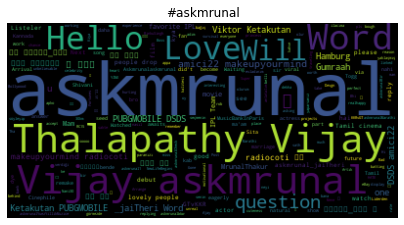

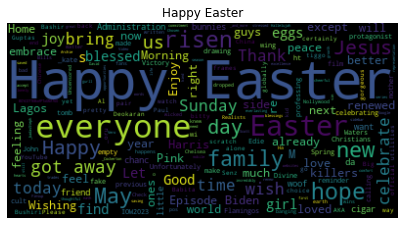

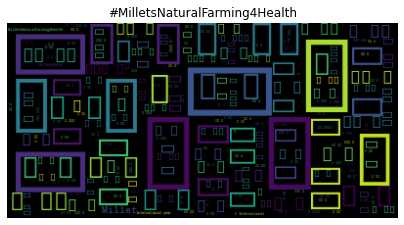

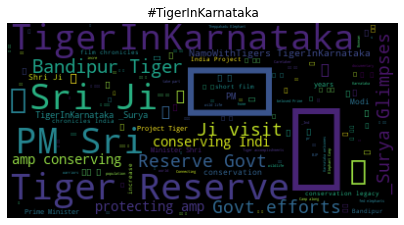

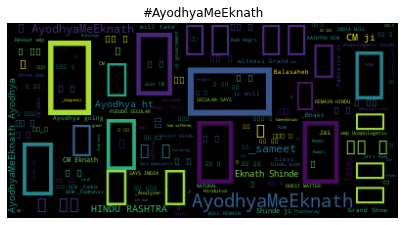

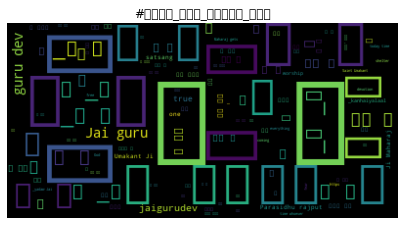

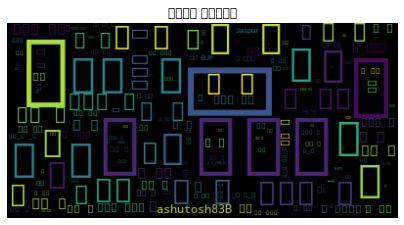

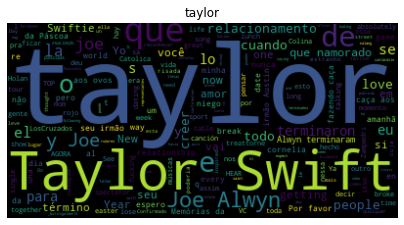

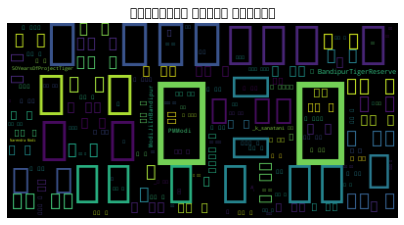

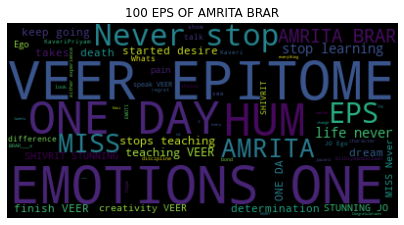

In [147]:
for i in df.columns:
#joining all the tweets to create a text corpus
    allWords= ''.join([twt for twt in df[i]])

#generating the word cloud using the WordCloud package
    wordCloud= WordCloud(random_state=20, max_font_size=120).generate(allWords)

#plotting the text cloud
    plt.figure(figsize=(7,5))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(i);

**Some of the word Clouds may not completely render depending upon the language of the tweets**

## Performing Sentiment Analysis for each trending topic.

In [148]:

#function to get the subjectivity of a tweet using textblob package
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

#function to get the polarity of a tweet using textblob package
def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity
#function to get the sentiment of a tweet using the polarity of that tweet
def getAnalysis(score):
    if score<0:
        return "Negative"
    elif score==0:
        return "Neutral"
    else:
        return "Positive"

### Histogram representing number of positive, neutral, and negative tweets for each trending topic

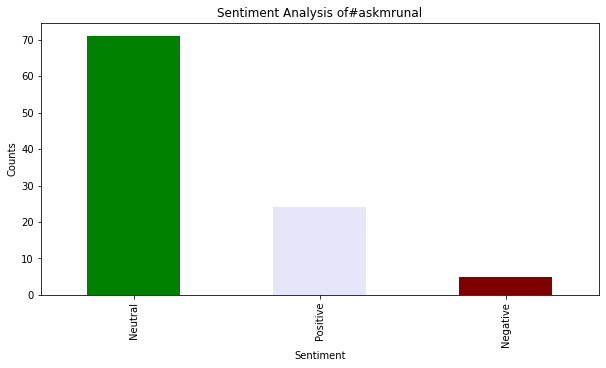

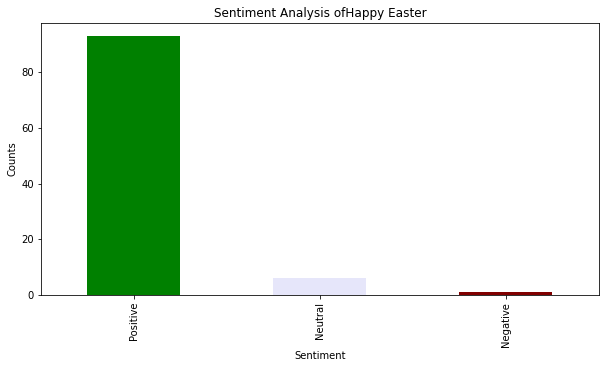

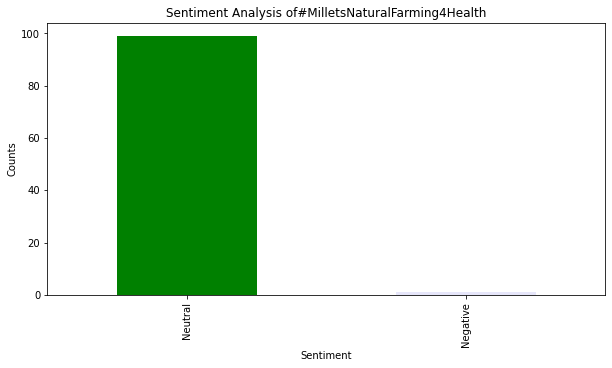

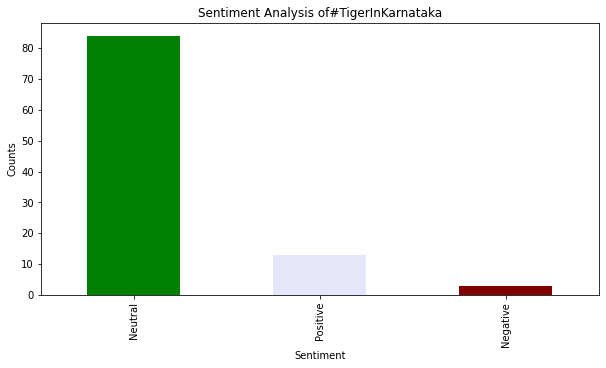

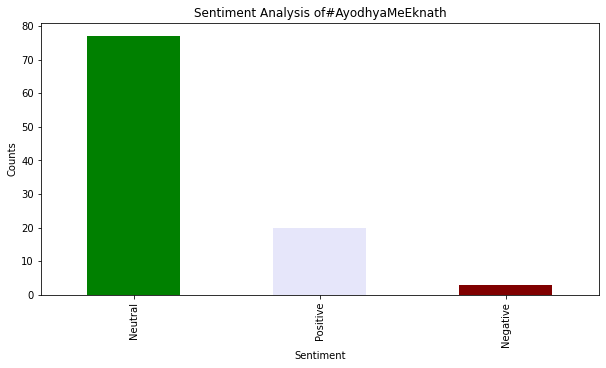

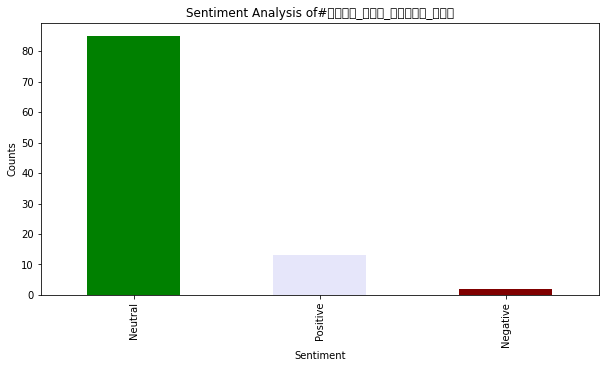

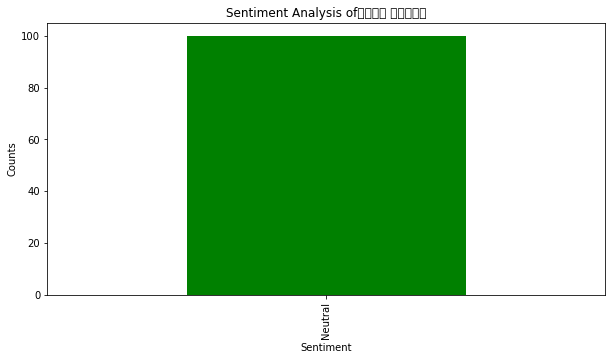

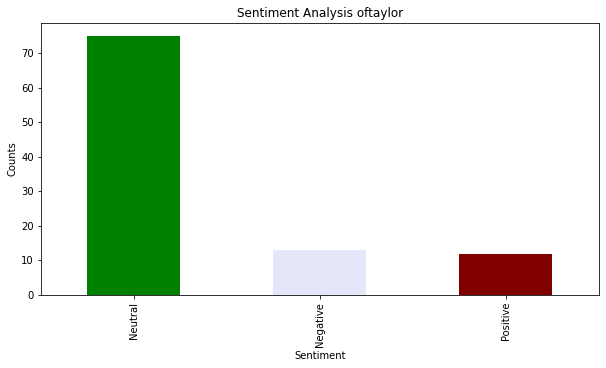

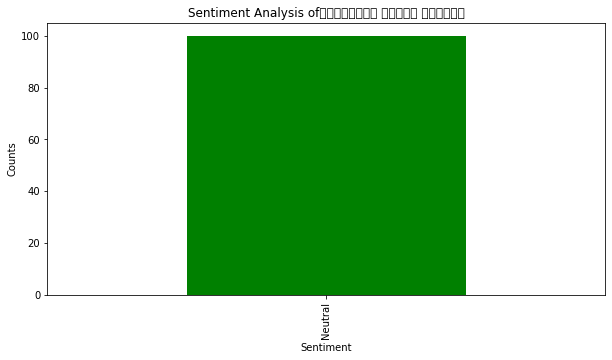

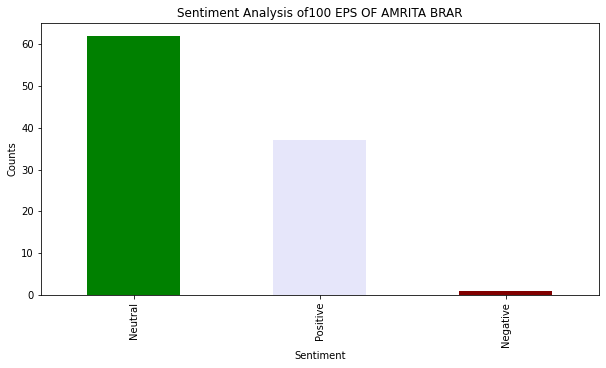

In [149]:
c=0
for i in df.columns:
    if c>10:
        break
    else:
        df['Subjectivity']= df[i].apply(getSubjectivity)
        df['Polarity']= df[i].apply(getPolarity)
        df['Analysis']= df['Polarity'].apply(getAnalysis)
    #Histogram representing number of positive, neutral, and negative tweets
        plt.figure(figsize=(10,5))
        s="Sentiment Analysis of " + str(i)
        plt.title(s)
        plt.xlabel('Sentiment')
        plt.ylabel('Counts')

        df['Analysis'].value_counts().plot(kind='bar', color=['green', 'lavender', 'maroon'])

        plt.show()
        c+=1

#### Some of the graphs shows completely neutral text because of  the tweets being of different language.